In [1]:
import dgl
import numpy as np
import pickle
import matplotlib.pyplot as plt
import torch

In [2]:
pickle_name = 'domain_dataset.pickle'
with open(pickle_name, 'rb') as f:
    dataset = pickle.load(f)

In [3]:
normal_nodes = np.asarray([d.num_nodes() for d, cl in dataset if cl == 0])
normal_edges = np.asarray([d.num_edges() for d, cl in dataset if cl == 0])
propaganda_nodes = np.asarray([d.num_nodes() for d, cl in dataset if cl == 1])
propaganda_edges = np.asarray([d.num_edges() for d, cl in dataset if cl == 1])

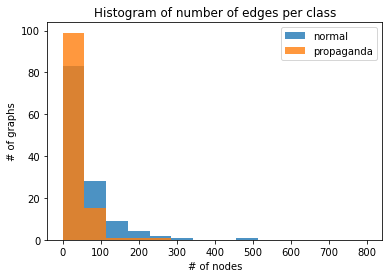

In [4]:

bins = np.linspace(0, 800, 15)
plt.figure()
plt.title('Histogram of number of edges per class')
plt.hist(normal_nodes, bins, label='normal', alpha=.8)

plt.hist(propaganda_nodes, bins, label='propaganda', alpha=.8)
plt.xlabel('# of nodes')
plt.ylabel('# of graphs')
plt.legend()
plt.show()

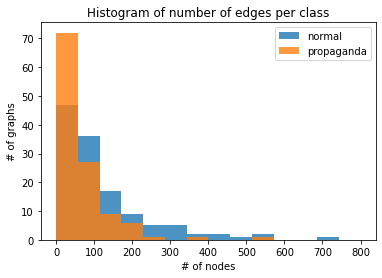

In [5]:
plt.figure()
plt.title('Histogram of number of edges per class')
plt.hist(normal_edges, bins, label='normal', alpha=.8)

plt.hist(propaganda_edges, bins, label='propaganda', alpha=.8)

plt.xlabel('# of nodes')
plt.ylabel('# of graphs')
plt.legend()
plt.show()

In [6]:
normal_density = normal_edges/normal_nodes
propaganda_density = propaganda_edges/propaganda_nodes

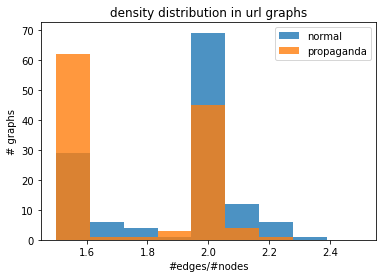

In [7]:
bins=np.linspace(1.5, 2.5, 10)

plt.figure()
plt.title('density distribution in url graphs')
plt.ylabel('# graphs')
plt.xlabel('#edges/#nodes')
plt.hist(normal_density, bins, label='normal', alpha=.8)
plt.hist(propaganda_density, bins, label='propaganda', alpha=.8)
plt.legend()
plt.show()

In [8]:
normal_nodes = np.asarray([d.num_nodes() for d, cl in dataset if cl == 0])
normal_edges = np.asarray([d.num_edges() for d, cl in dataset if cl == 0])
propaganda_nodes = np.asarray([d.num_nodes() for d, cl in dataset if cl == 1])
propaganda_edges = np.asarray([d.num_edges() for d, cl in dataset if cl == 1])

In [9]:
# node_fv is [degree centrality, betweenness centrality, eigenvector centrality, clustering coeffitient]
normal_node_fv = np.vstack([graph.ndata['node_fv'].numpy() for graph, label in dataset if label == 0])
propaganda_node_fv = np.vstack([graph.ndata['node_fv'].numpy() for graph, label in dataset if label == 1])
norm_degree, norm_betweenness, norm_eig, norm_clust = normal_node_fv.T
prop_degree, prop_betweenness, prop_eig, prop_clust = propaganda_node_fv.T

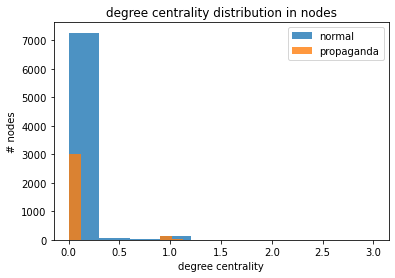

In [10]:
plt.figure()
plt.title('degree centrality distribution in nodes')
plt.ylabel('# nodes')
plt.xlabel('degree centrality')
plt.hist(norm_degree, label='normal', alpha=.8)
plt.hist(prop_degree, label='propaganda', alpha=.8)
plt.legend()
plt.show()

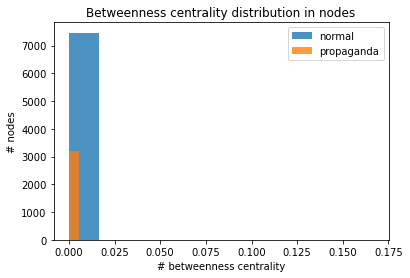

9.886051e-05

In [17]:
plt.figure()
plt.title('Betweenness centrality distribution in nodes')
plt.ylabel('# nodes')
plt.xlabel('# betweenness centrality')
plt.hist(norm_betweenness, label='normal', alpha=.8)
plt.hist(prop_betweenness, label='propaganda', alpha=.8)
plt.legend()
plt.show()
norm_betweenness.mean()

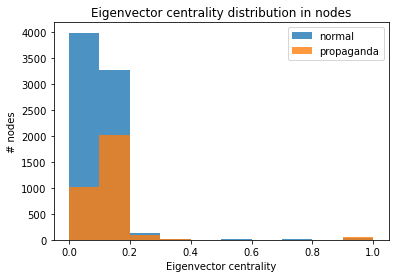

In [12]:
plt.figure()
plt.title('Eigenvector centrality distribution in nodes')
plt.ylabel('# nodes')
plt.xlabel('Eigenvector centrality')
plt.hist(norm_eig, label='normal', alpha=.8)
plt.hist(prop_eig, label='propaganda', alpha=.8)
plt.legend()
plt.show()

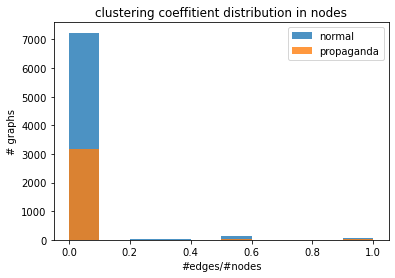

In [13]:
plt.figure()
plt.title('clustering coeffitient distribution in nodes')
plt.ylabel('# graphs')
plt.xlabel('#edges/#nodes')
plt.hist(norm_clust, label='normal', alpha=.8)
plt.hist(prop_clust, label='propaganda', alpha=.8)
plt.legend()
plt.show()

In [14]:
mean_normal_node = normal_node_fv.mean(0)
mean_propaganda_node = propaganda_node_fv.mean(0)
print("mean node feature vectors (normal, propaganda):\n", mean_normal_node, mean_propaganda_node)

mean node feature vectors (normal, propaganda):
 [3.6189374e-02 9.8860495e-05 9.1324024e-02 1.9196998e-02] [7.3505342e-02 7.1002818e-05 1.3506484e-01 9.2307320e-03]


In [15]:
all_cov = np.cov(np.vstack((normal_node_fv, propaganda_node_fv)).T)
print("Cov matrix for all nodes")
print(all_cov)

Cov matrix for all nodes
[[ 3.05588604e-02  5.32193997e-05  8.14391879e-03 -4.81066493e-04]
 [ 5.32193997e-05  3.96017073e-06 -1.03763027e-06 -1.03244034e-06]
 [ 8.14391879e-03 -1.03763027e-06  1.20185061e-02  4.02766915e-04]
 [-4.81066493e-04 -1.03244034e-06  4.02766915e-04  1.15817563e-02]]


In [16]:
normal_cov = np.cov(normal_node_fv.T)
print("Cov matrix for nodes in normal graphs")
pritn(normal_cov)

Cov matrix for nodes in normal graphs


NameError: name 'pritn' is not defined

In [ ]:
propaganda_cov = np.cov(propaganda_node_fv.T)
print("Cov matrix for nodes in propaganda graphs")
pritn(propaganda_cov)